In [6]:
import numpy as np
from dataclasses import dataclass
import enum


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [79]:
rockpatterns =[]

def rocktype(c):
    match c:
        case "O": return 2
        case "#": return 1
        case ".": return 0

ex= """O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#...."""
initialex = np.array([[rocktype(c) for c in line] for line in ex.splitlines()],dtype=int)

with open("input14.txt") as f:
    initialplatform = np.array([[rocktype(c) for c in line] for line in f.read().splitlines()],dtype=int)


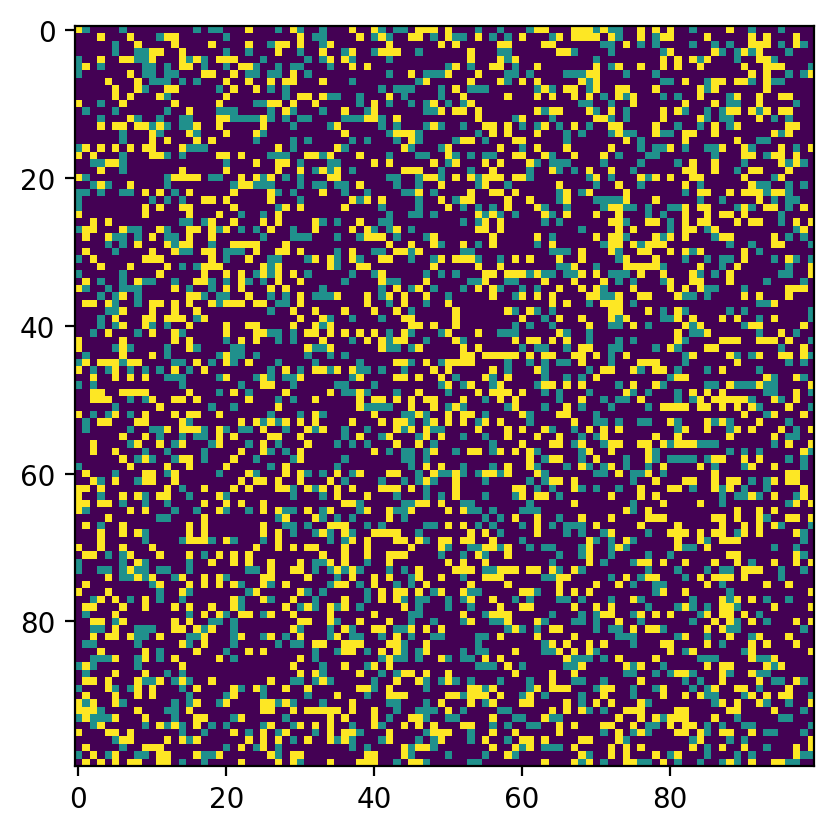

In [33]:
plt.imshow(initialplatform)

# Part 1

In [25]:
def rockload(platform):
    N,M = platform.shape
    return np.sum(N-np.where(platform>1)[0])

In [30]:
def tiltnorth(platform):
    N,M = platform.shape
    for y,row in enumerate(platform):
        for x,rock in enumerate(row):
            if rock==2:
                try:
                    lastrock = np.where(platform[:y,x]>0)[0][-1]
                except IndexError:
                    lastrock = -1
                platform[y,x]=0
                platform[lastrock+1,x]=2
            

Initial rock load: 99918
Noth tilted rock load: 107142


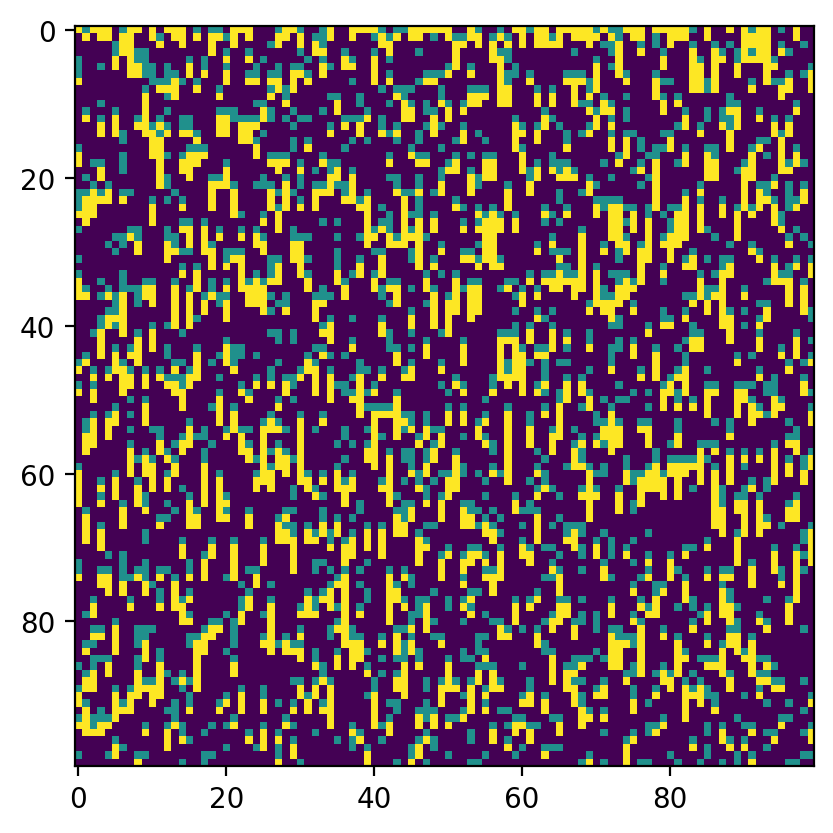

In [36]:
print(f"Initial rock load: {rockload(initialplatform)}")
platform = initialplatform.copy()
tiltnorth(platform)
print(f"Noth tilted rock load: {rockload(platform)}")
plt.imshow(platform)


# Part 2

In [97]:
def tilteast(platform):
    N,M = platform.shape
    for y,row in enumerate(platform):
        for x,rock in reversed(list(enumerate(row))):
            if rock==2:
                try:
                    lastrock = x+1+np.where(platform[y,x+1:]>0)[0][0]
                except IndexError:
                    lastrock = M
                platform[y,x]=0
                platform[y,lastrock-1]=2

def tiltsouth(platform):
    N,M = platform.shape
    for y,row in reversed(list(enumerate(platform))):
        for x,rock in enumerate(row):
            if rock==2:
                try:
                    lastrock = y+1+np.where(platform[y+1:,x]>0)[0][0]
                except IndexError:
                    lastrock = N
                platform[y,x]=0
                platform[lastrock-1,x]=2

def tiltwest(platform):
    N,M = platform.shape
    for y,row in enumerate(platform):
        for x,rock in enumerate(row):
            if rock==2:
                try:
                    lastrock = np.where(platform[y,:x]>0)[0][-1]
                except IndexError:
                    lastrock = -1
                platform[y,x]=0
                platform[y,lastrock+1]=2

def debughelper(platform):
    # print((platform==2).sum())
    print(rockload(platform))
    plt.imshow(platform)
    plt.show()

def spincycle(platform, debug=False):
    if debug: debughelper(platform)
    tiltnorth(platform)
    if debug: debughelper(platform)
    tiltwest(platform)
    if debug: debughelper(platform)
    tiltsouth(platform)
    if debug: debughelper(platform)
    tilteast(platform)
    if debug: debughelper(platform)
    


In [85]:
def longwashingprogram(platform,Ncycles):
    previousstates ={}
    cnt = 0
    while (cnt<Ncycles) and ((hsh:=hash(tuple(platform.flatten()))) not in previousstates.keys()):
        previousstates[hsh] = cnt
        spincycle(platform)
        cnt+=1
    if cnt<Ncycles:
        startloop = previousstates[hsh]
        cyclelen = cnt-startloop
        for _ in range((Ncycles-startloop)%cyclelen):
            spincycle(platform)
    return cnt,startloop,cyclelen

99918
Noth tilted rock load: 104815


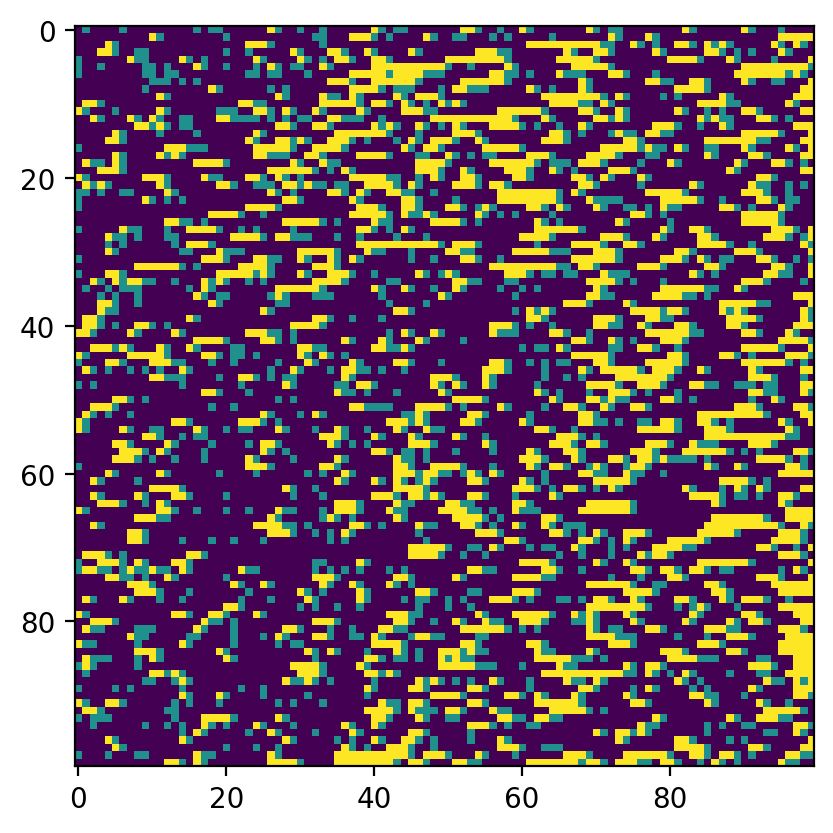

In [99]:
platform = initialplatform.copy()
cnt,startloop,cyclelen = longwashingprogram(platform,1_000_000_000)
print(f"Noth tilted rock load: {rockload(platform)}")
plt.imshow(platform)

104
Noth tilted rock load: 64


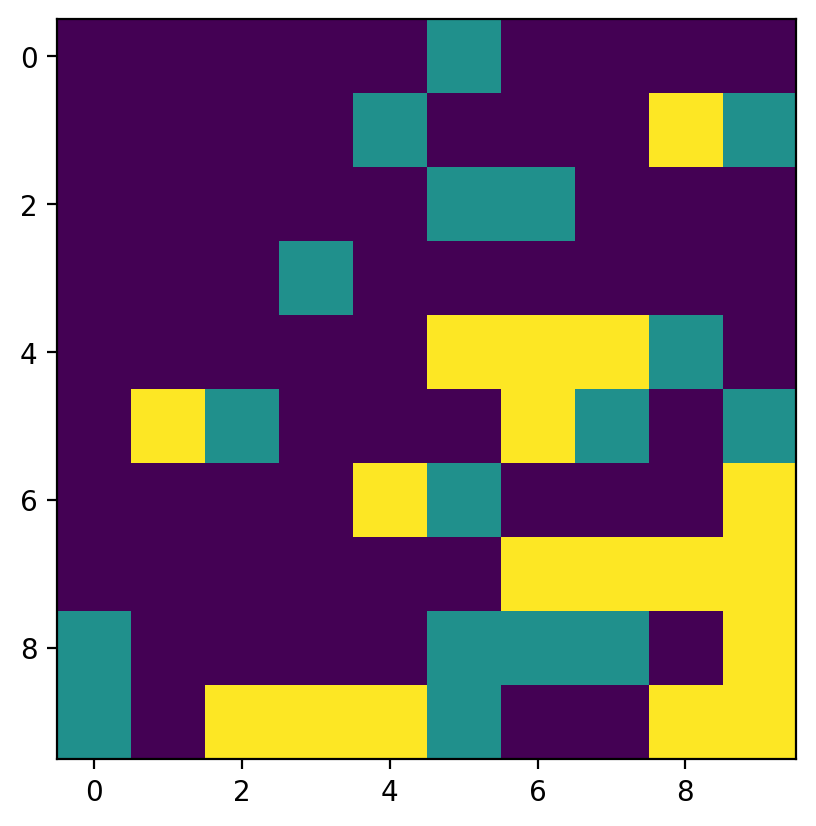

In [98]:
platform = initialex.copy()
cnt,startloop,cyclelen = longwashingprogram(platform,1_000_000_000)
print(f"Noth tilted rock load: {rockload(platform)}")
plt.imshow(platform)